<a href="https://colab.research.google.com/github/SebasCrack7/WalmartProyect/blob/main/DataClearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpieza de datos, base de datos:

https://www.kaggle.com/datasets/mikhail1681/walmart-sales?resource=download

In [ ]:
#import a csv document from a shared drive folder
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carga de la base de datos para Dani
excel_file_path = '/content/drive/My Drive/Proyecto/Walmart_Sales.csv'
df = pd.read_csv(excel_file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Proyecto/Walmart_Sales.csv'

In [ ]:
#Carga de la base de datos para Sebas
excel_file_path = '/content/drive/My Drive/Prog2/Proyecto/Walmart_Sales.csv'
df = pd.read_csv(excel_file_path)

In [ ]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Define the target variable
target = df['Weekly_Sales']

# Define the features by dropping 'Weekly_Sales' and 'Date'
features = df.drop(['Date',"Weekly_Sales"], axis=1)

# Check for missing values (already confirmed by df.info(), but good practice to re-verify)
print("Missing values in target variable:", target.isnull().sum())
print("Missing values in features:", features.isnull().sum().sum())

Missing values in target variable: 0
Missing values in features: 0


In [ ]:
!pip install huggingface_hub==0.19.0

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(features, target)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(target, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')

# Add a line for perfect prediction
min_sales = min(target.min(), predictions.min())
max_sales = max(target.max(), predictions.max())
plt.plot([min_sales, max_sales], [min_sales, max_sales], color='red', linestyle='--')

plt.show()

In [ ]:
correlation_temp_sales = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Weekly Sales and Temperature: {correlation_temp_sales}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Taller del curso:
dividir su conjunto de datos en train y test y ajustar una red neuronal con esos datos :D

## Identify the cohorts

### Subtask:
Identify the cohorts by extracting the unique store IDs from the DataFrame.


**Reasoning**:
Extract the unique store IDs from the 'Store' column to identify the cohorts.



In [ ]:
cohorts = df['Store'].unique()
print(cohorts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


## Group the data by cohort and time

### Subtask:
Group the data by 'Store' (cohort) and 'Date'.


**Reasoning**:
Convert the 'Date' column to datetime objects and then group the DataFrame by 'Store' and 'Date' as instructed.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
grouped_data = df.groupby(['Store', 'Date'])

## Aggregate data within each cohort-time period

### Subtask:
Aggregate the relevant variables for each store and date combination.


**Reasoning**:
Aggregate the grouped data by calculating the mean for the specified columns and reset the index to create the pseudo-panel DataFrame.



In [ ]:
pseudo_panel_df = grouped_data[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()

## Inspect the pseudo-panel data

### Subtask:
Display the first few rows and the information of the newly created pseudo-panel DataFrame to verify the structure and data types.


**Reasoning**:
Display the first few rows and the information of the newly created pseudo-panel DataFrame to verify the structure and data types as requested by the instructions.



In [ ]:
display(pseudo_panel_df.head())
pseudo_panel_df.info()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90           0.0        42.31       2.572   
1      1 2010-02-12    1641957.44           1.0        38.51       2.548   
2      1 2010-02-19    1611968.17           0.0        39.93       2.514   
3      1 2010-02-26    1409727.59           0.0        46.63       2.561   
4      1 2010-03-05    1554806.68           0.0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   float64       
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 402.3 KB


## Summary:

### Data Analysis Key Findings

*   45 unique stores were identified and used as cohorts for the pseudo-panel.
*   The data was successfully grouped by store and date, and key variables ('Weekly\_Sales', 'Holiday\_Flag', 'Temperature', 'Fuel\_Price', 'CPI', 'Unemployment') were aggregated by calculating their mean for each store-date combination.
*   The resulting pseudo-panel dataset has 6435 rows and 8 columns, with no missing values in the aggregated columns.

### Insights or Next Steps

*   The pseudo-panel dataset is ready for further analysis, such as time series analysis on aggregated store data or comparisons of performance metrics between different store cohorts over time.
*   Further analysis could involve adding more granular levels of data or external factors to enrich the pseudo-panel and gain deeper insights into store performance drivers.


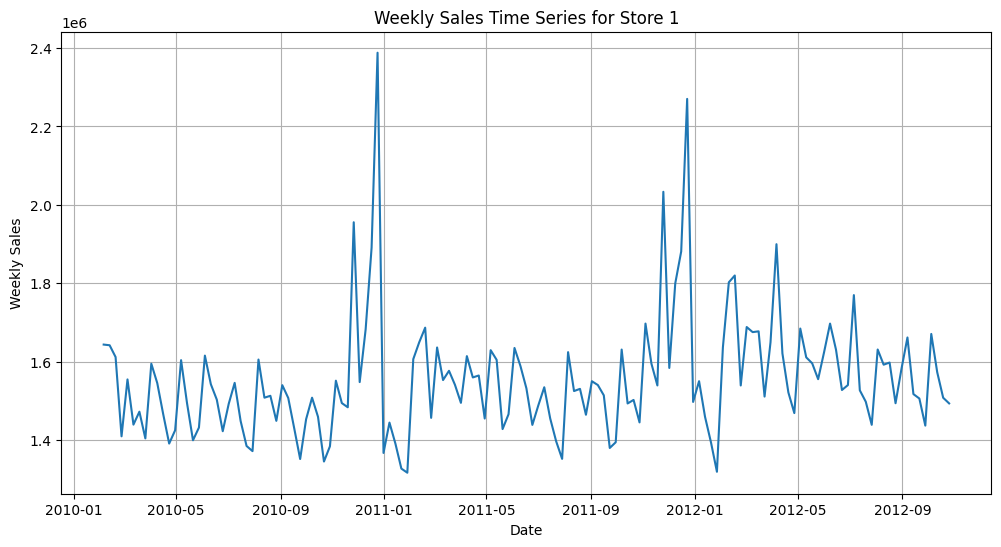

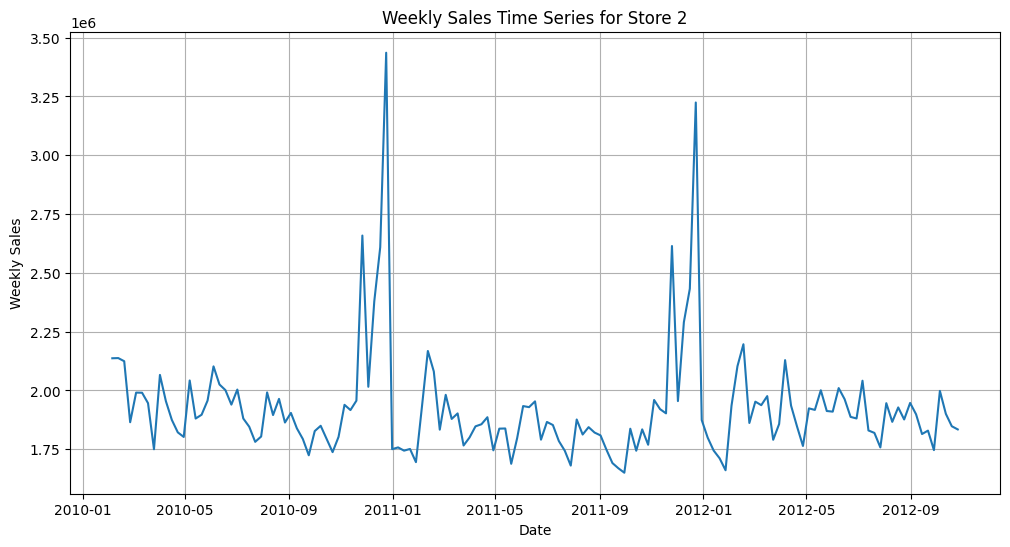

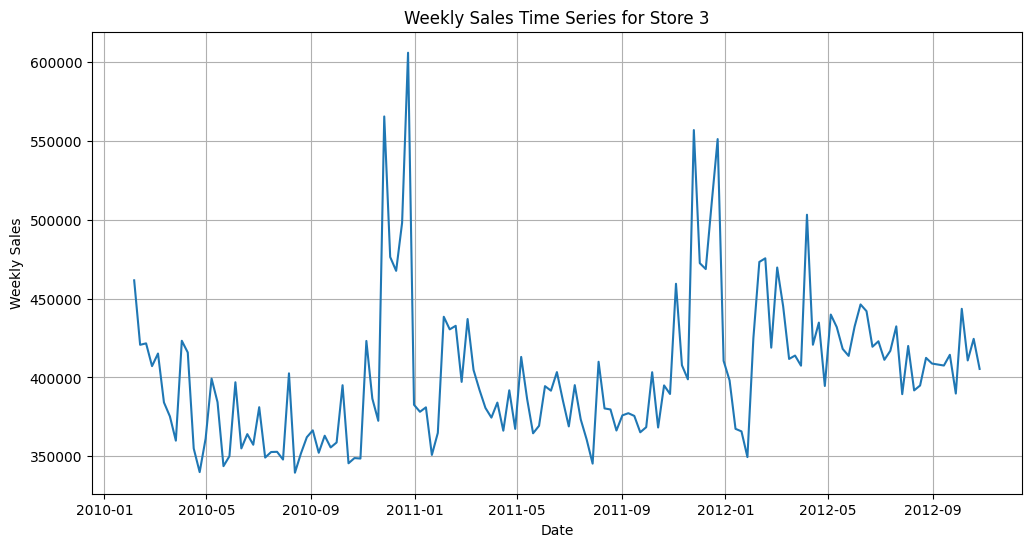

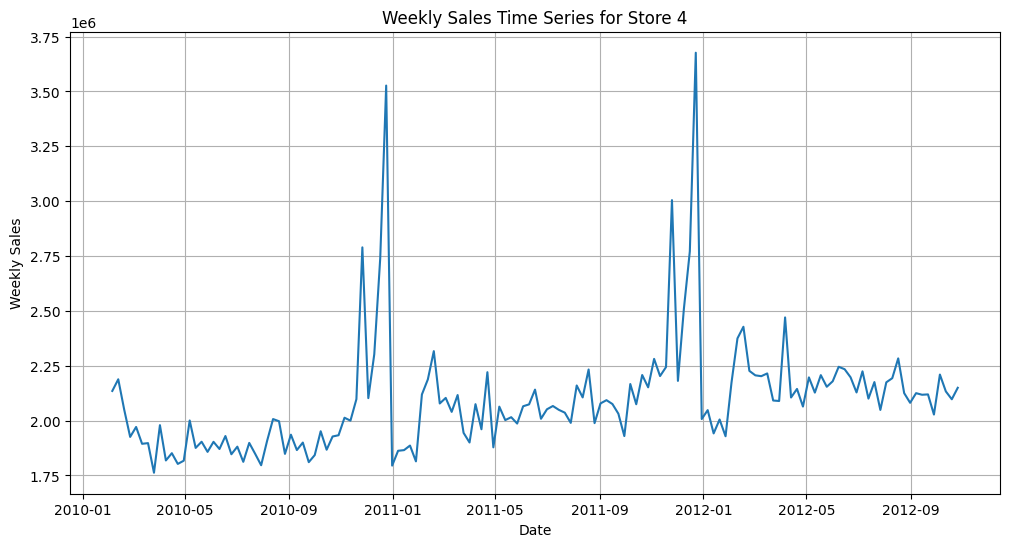

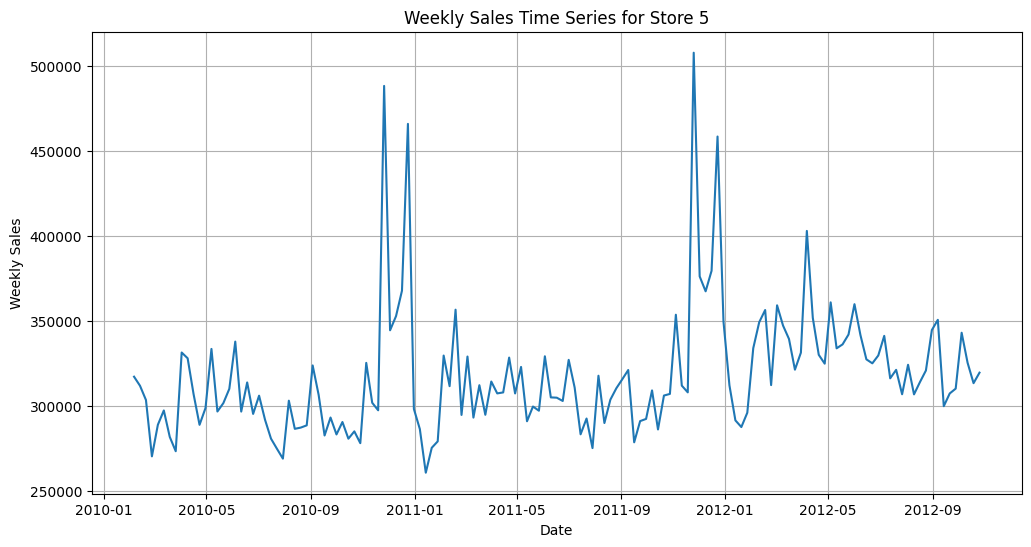

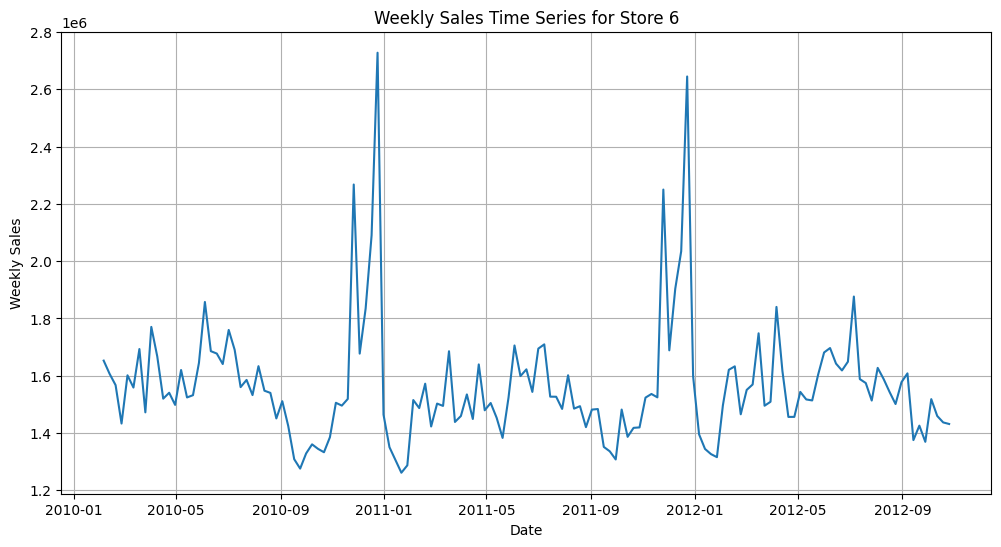

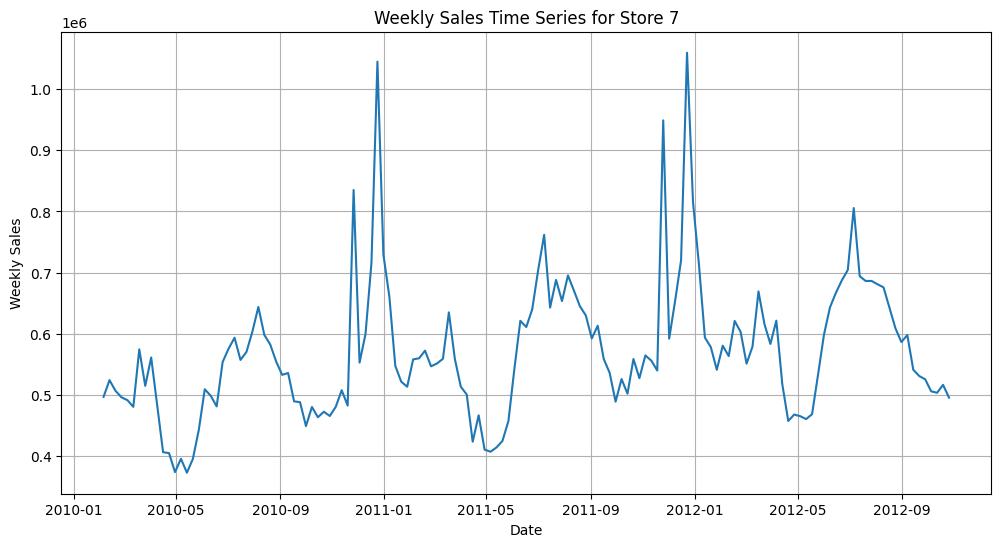

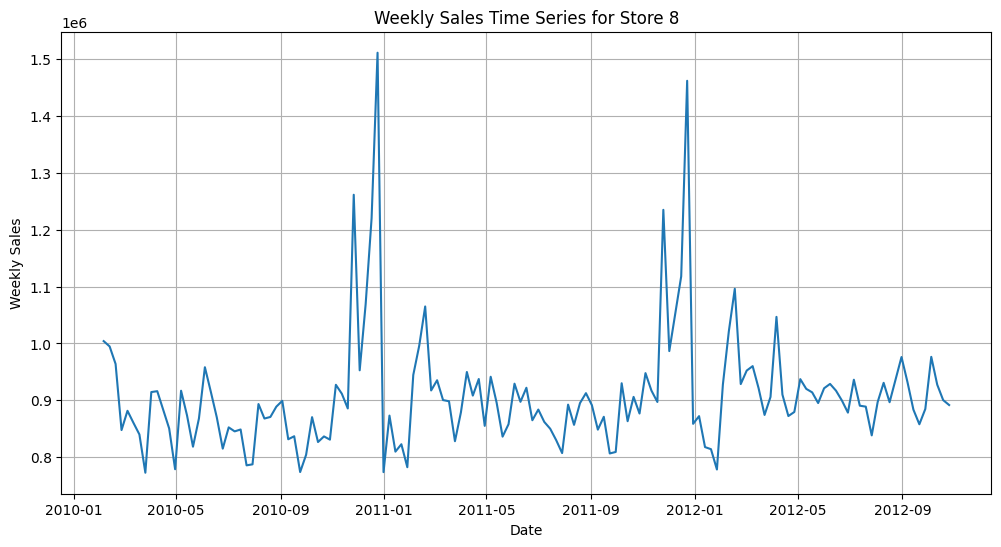

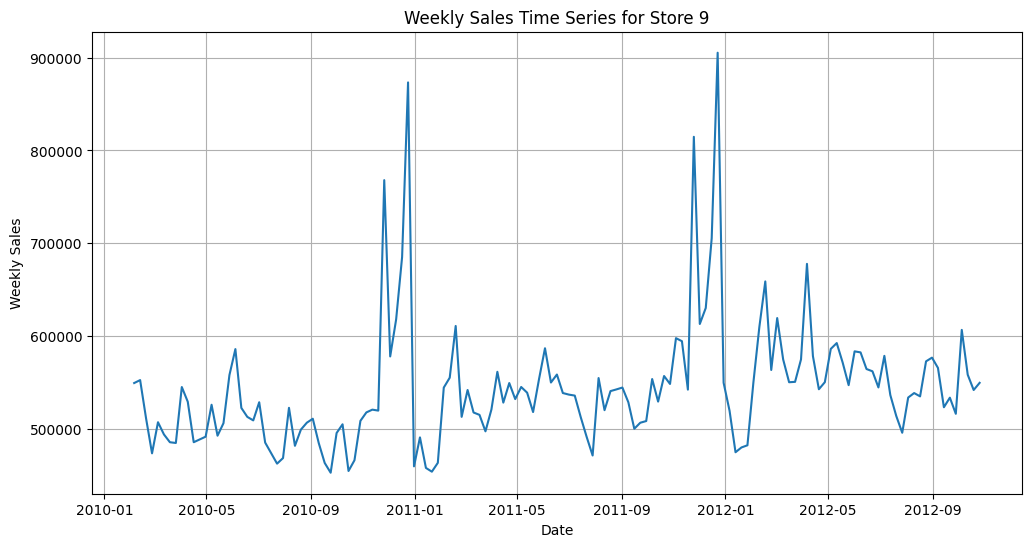

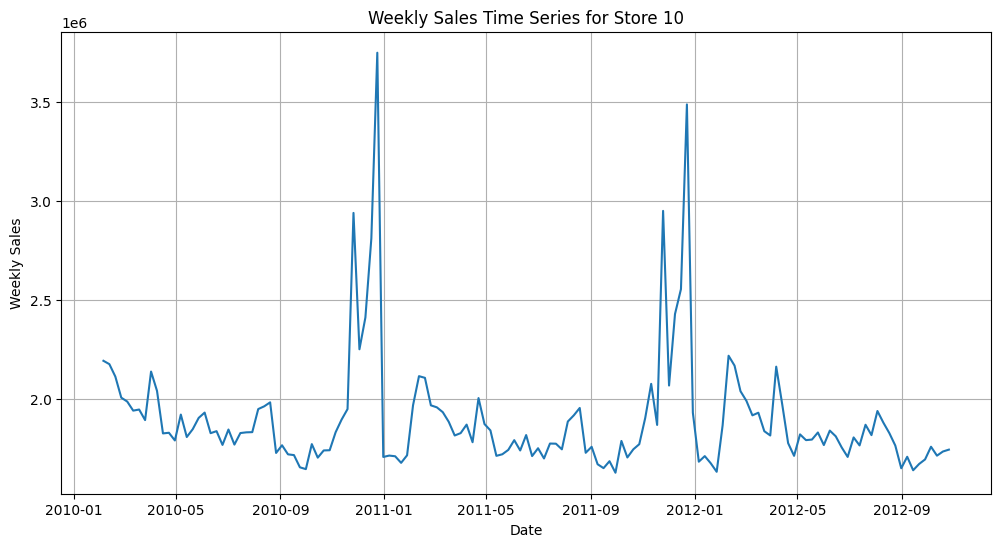

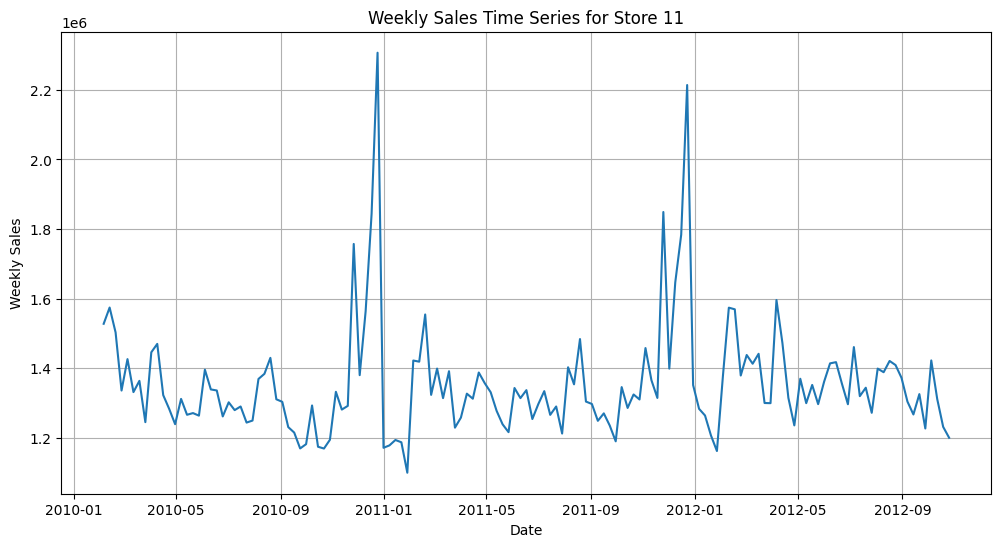

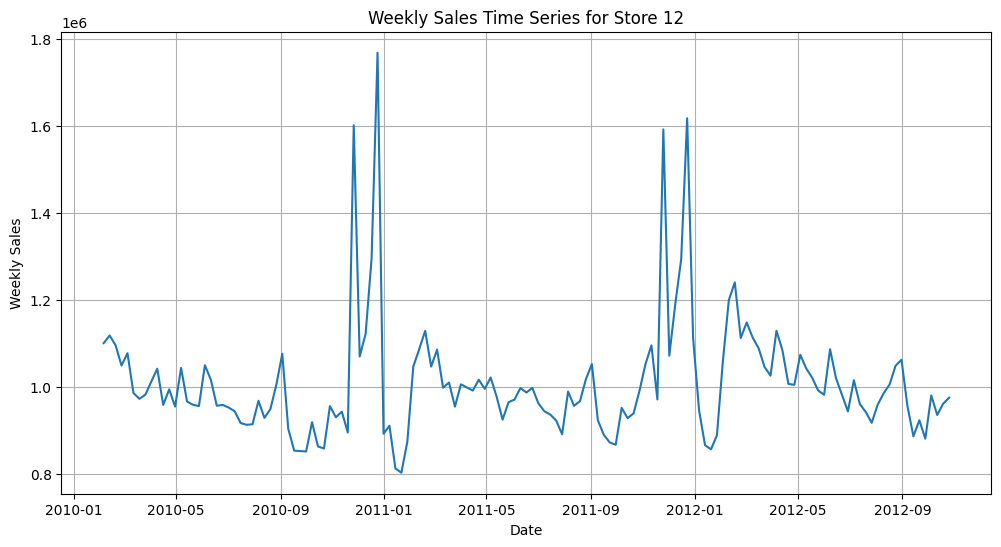

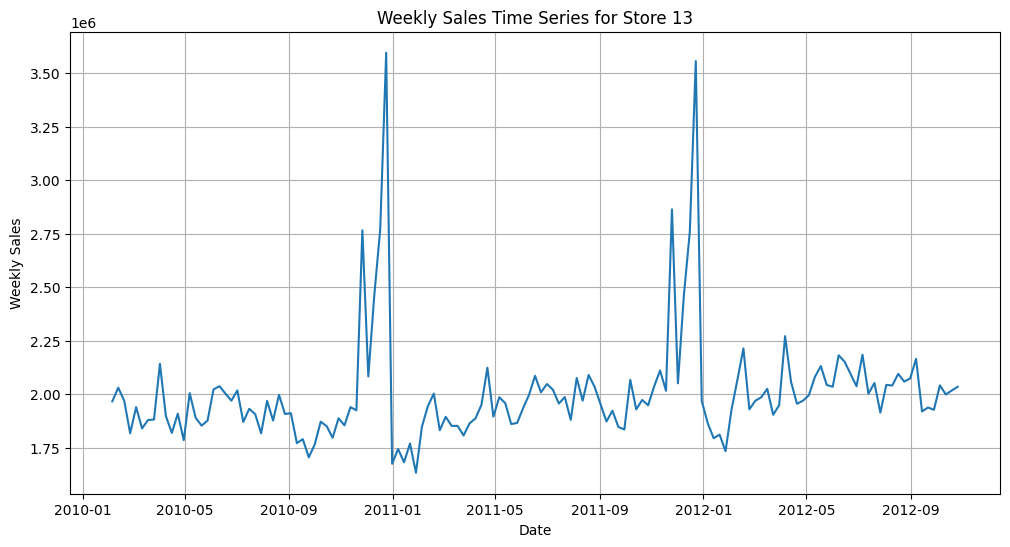

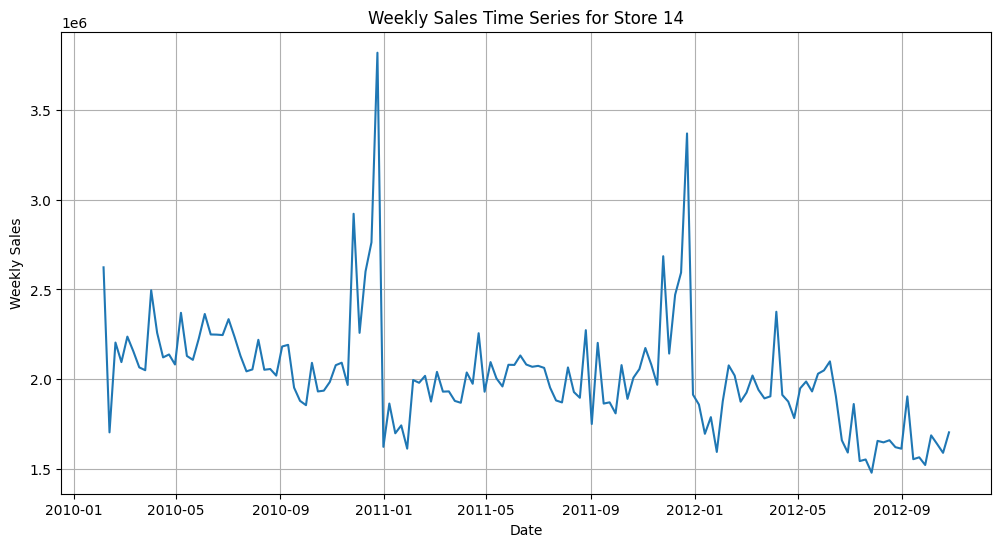

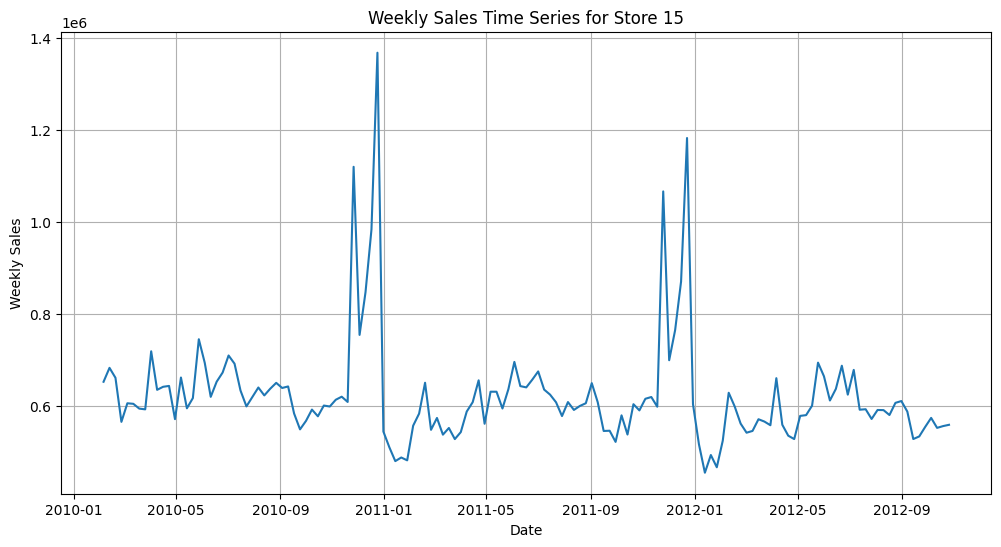

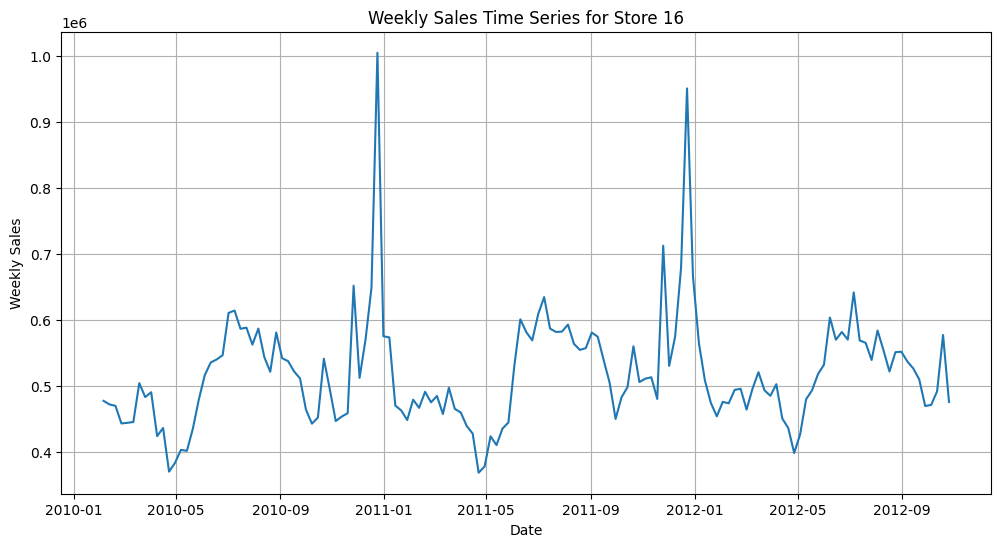

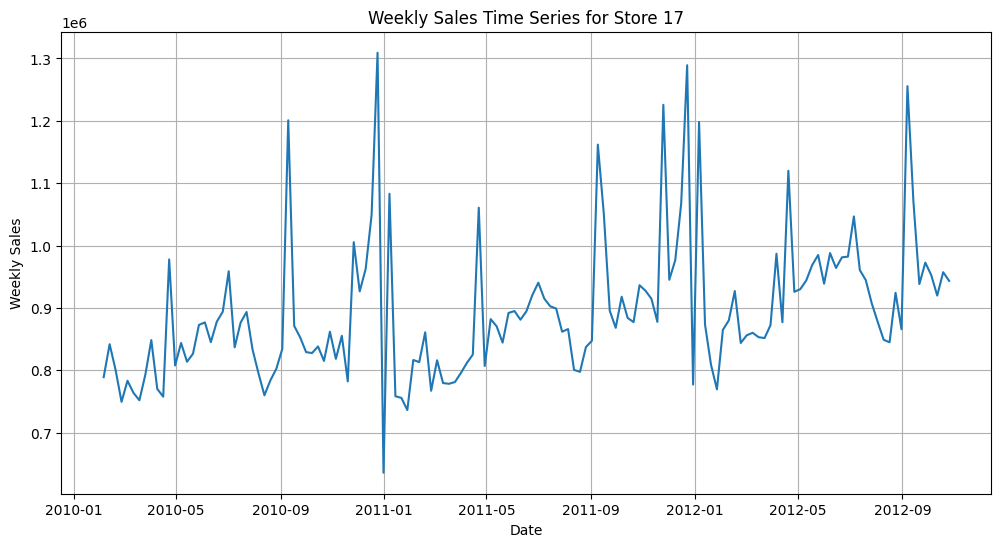

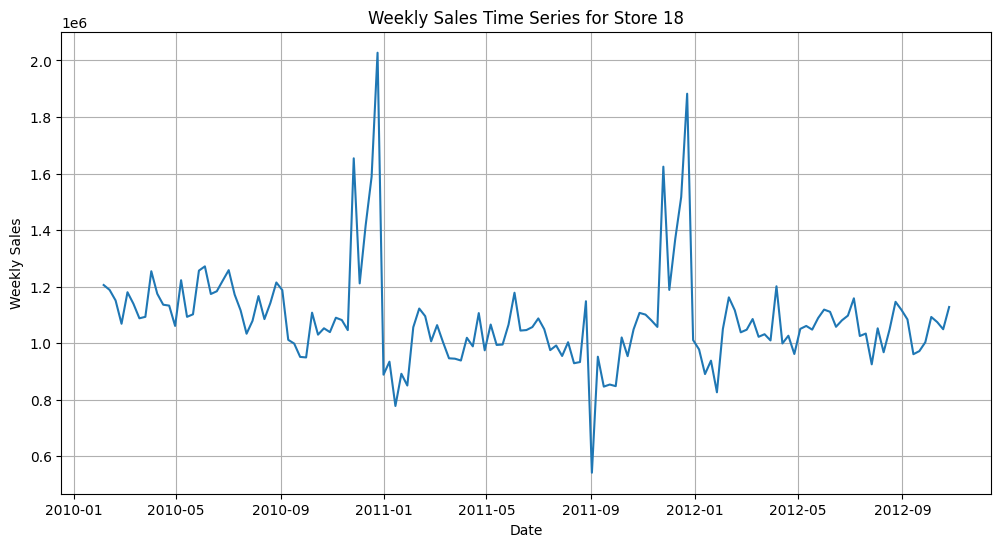

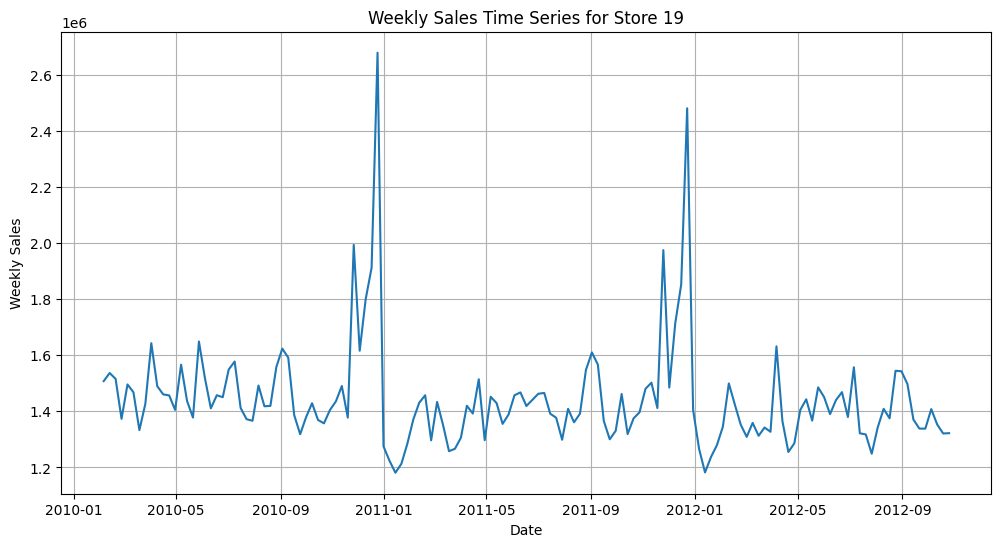

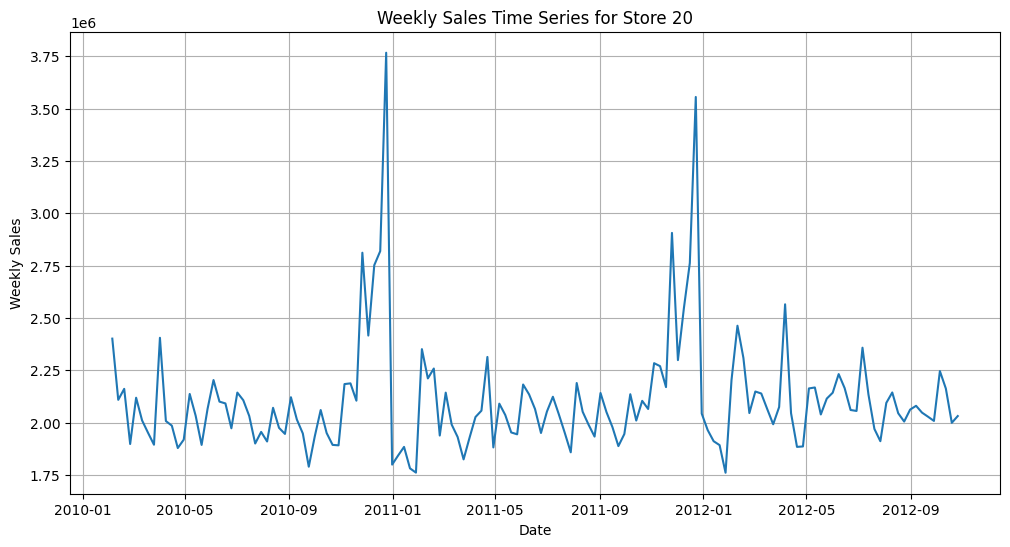

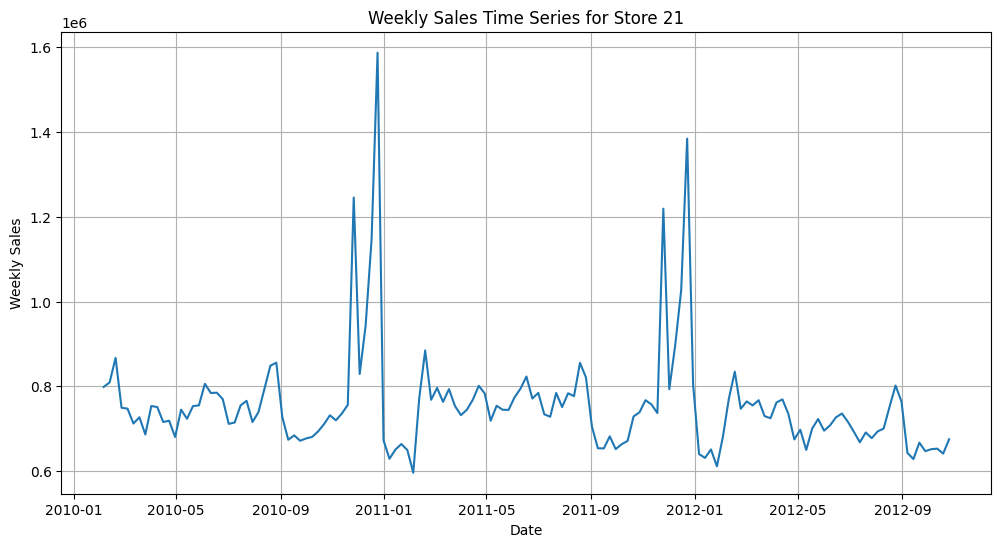

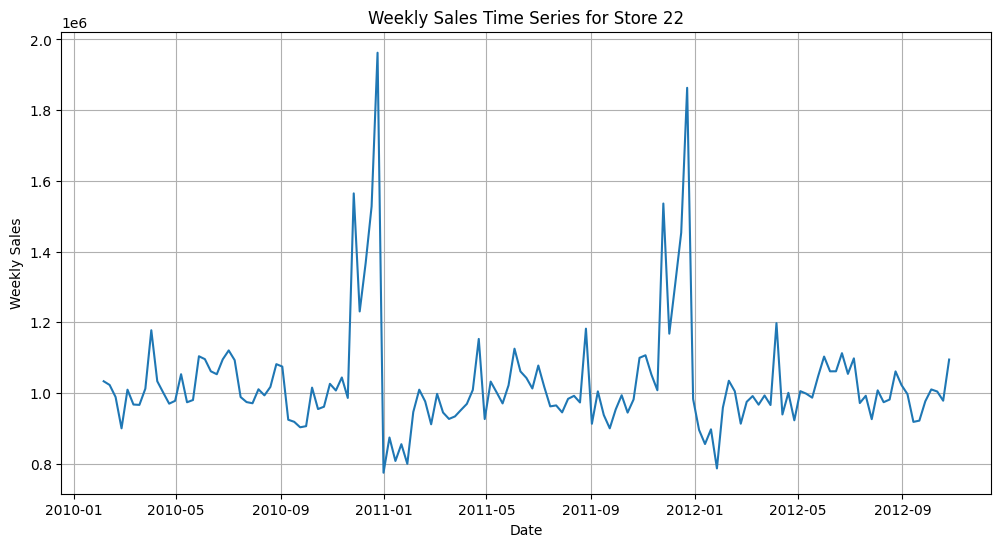

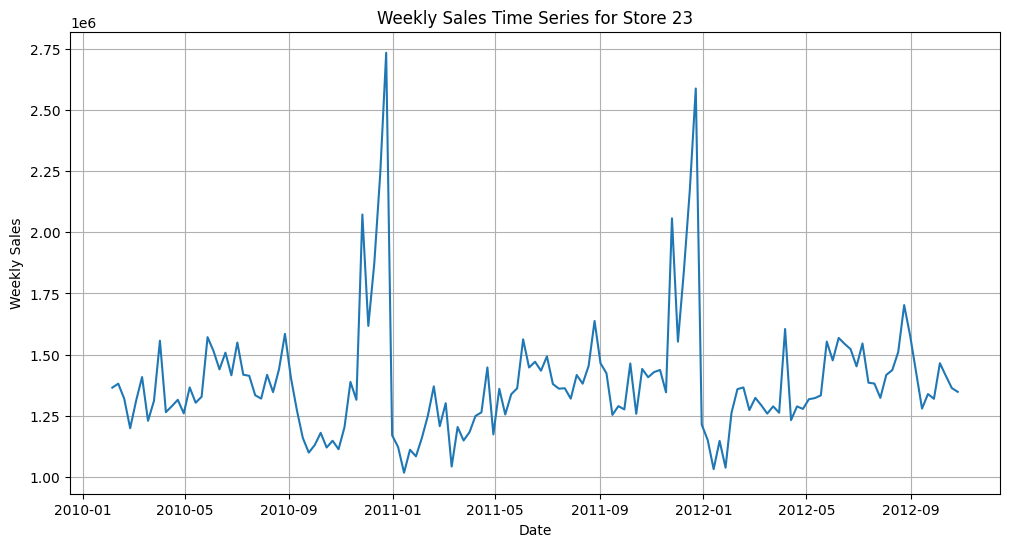

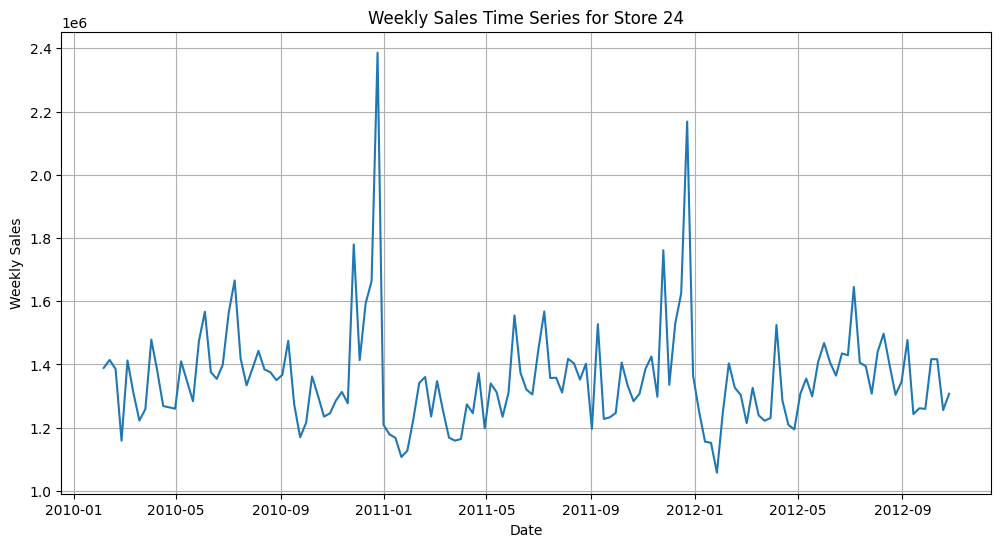

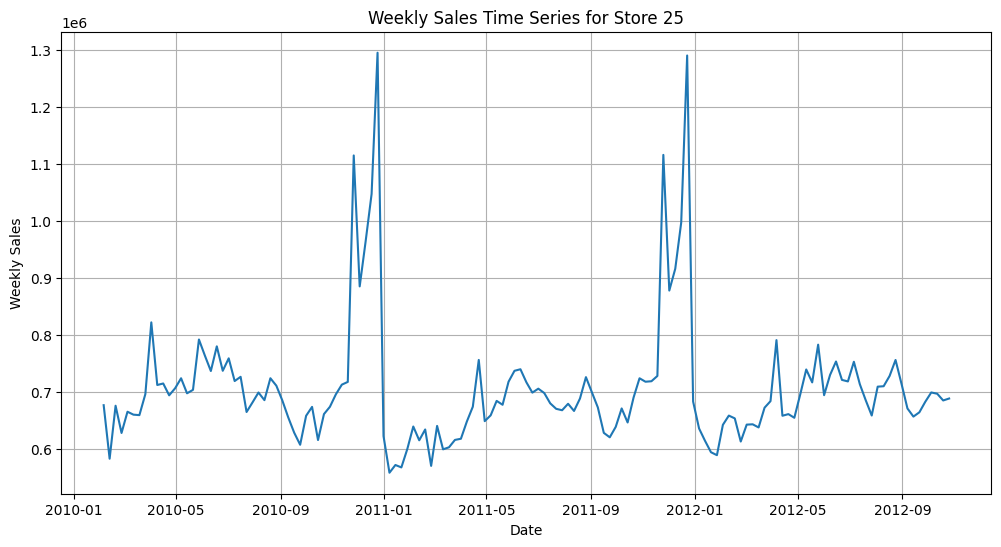

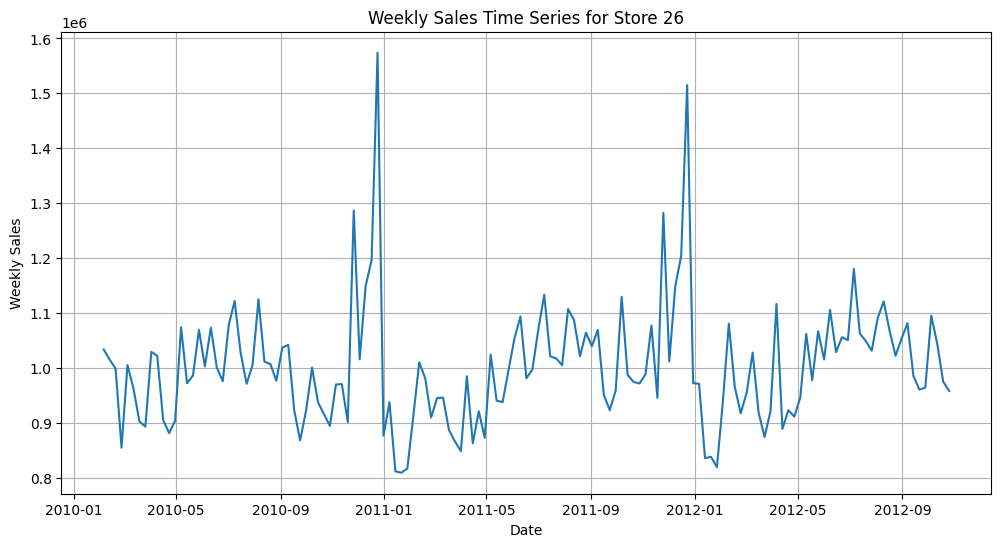

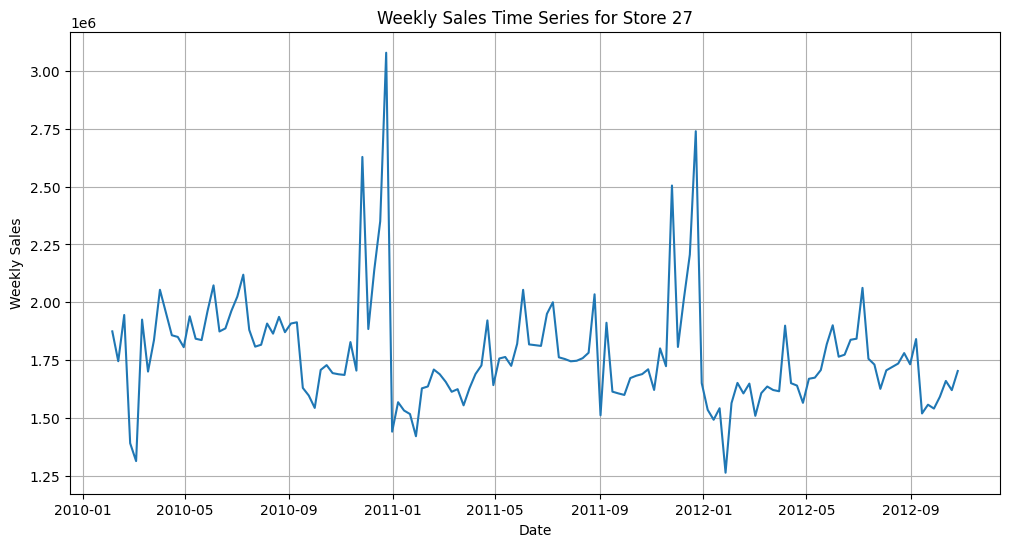

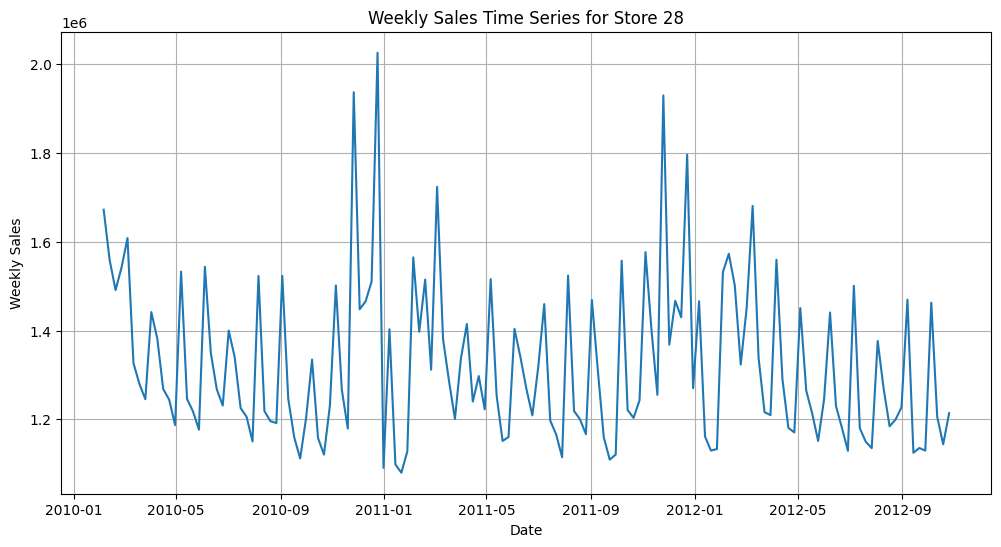

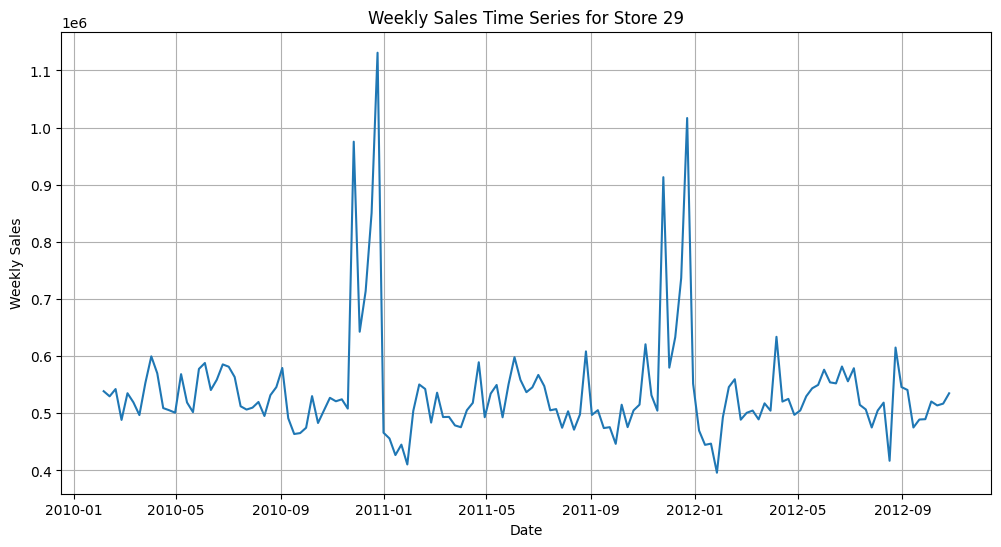

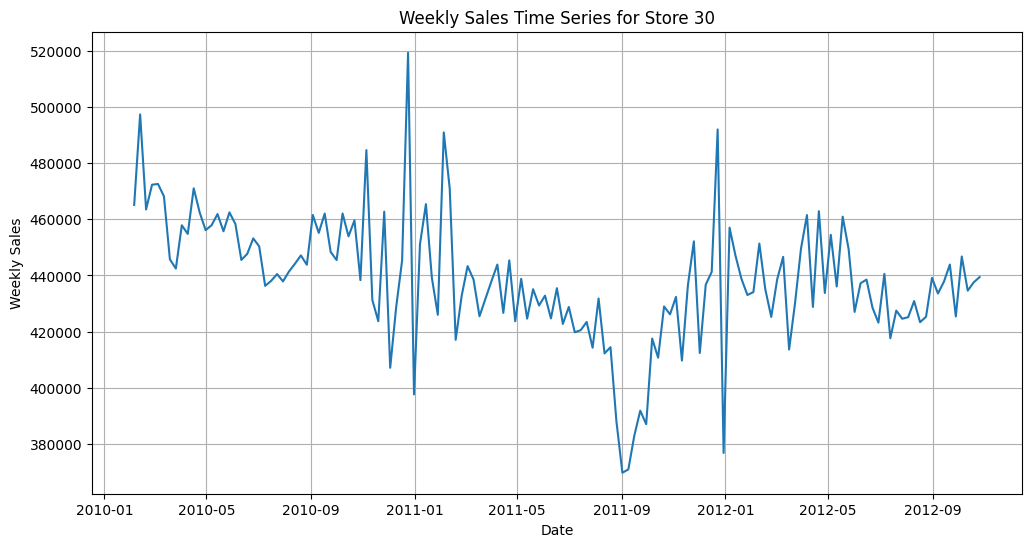

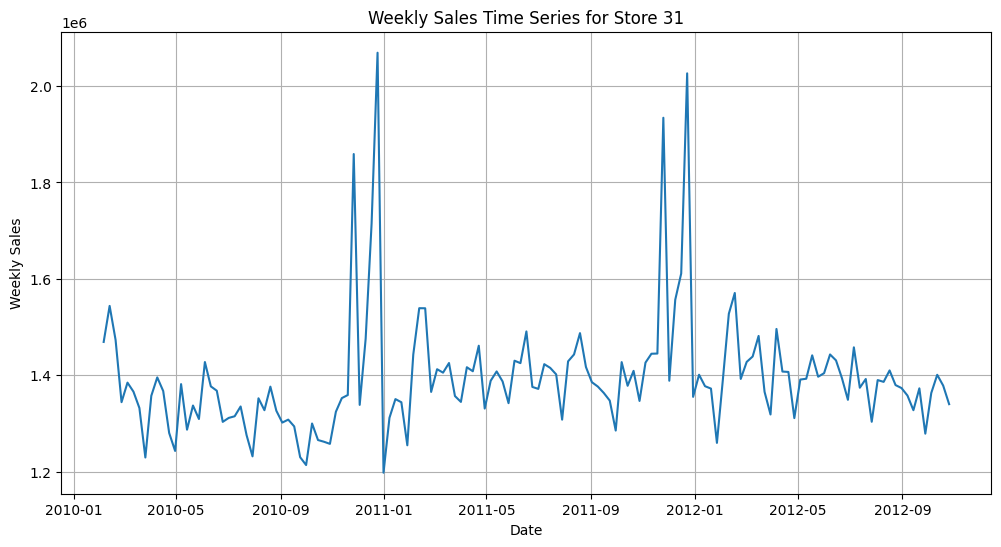

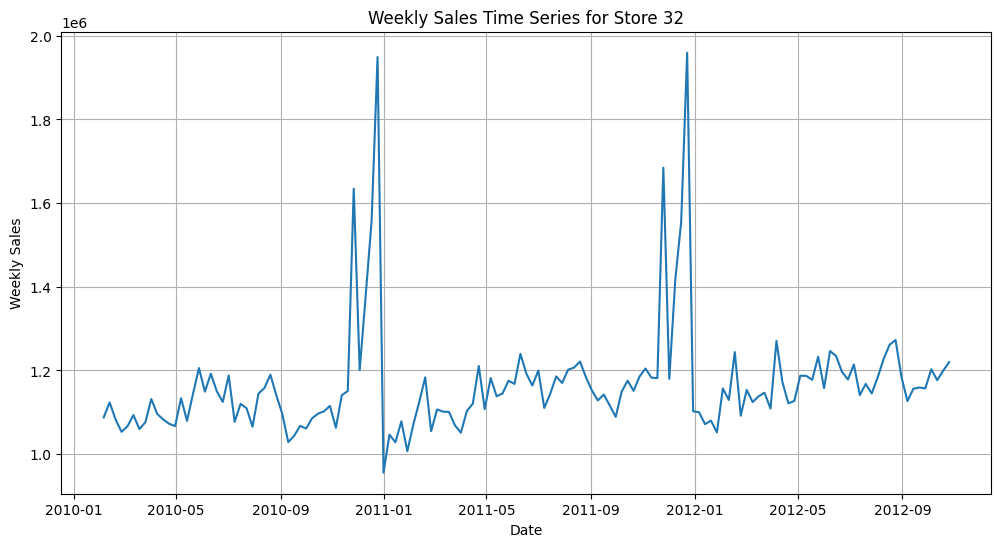

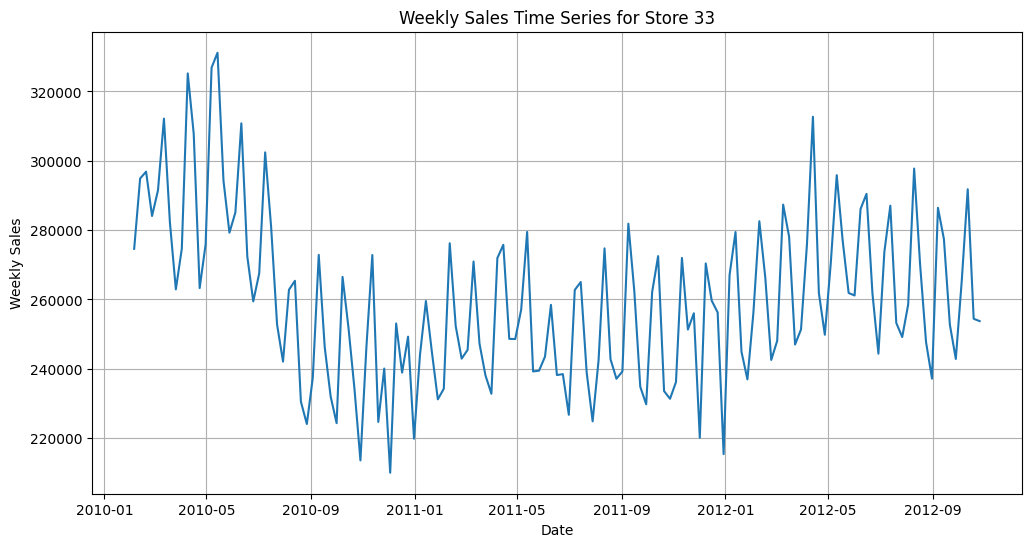

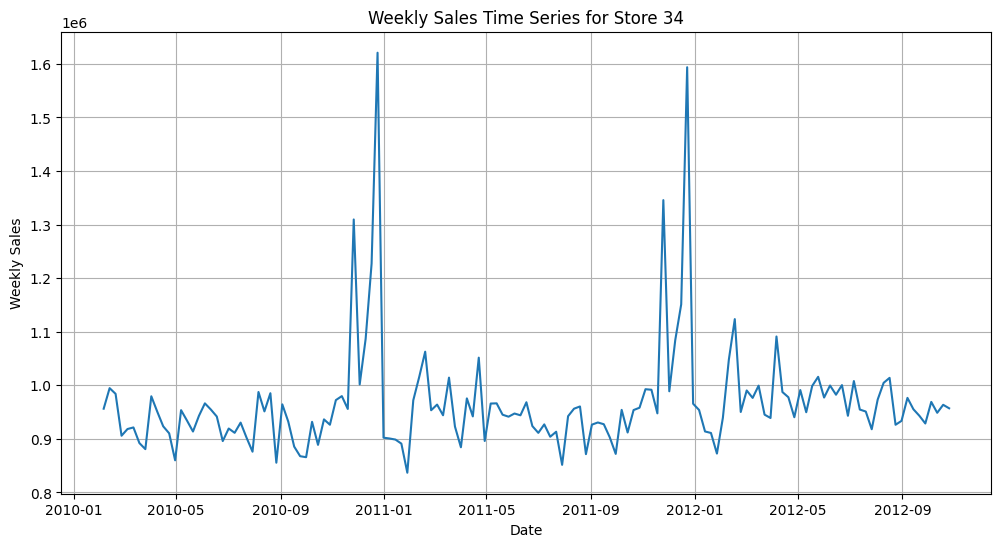

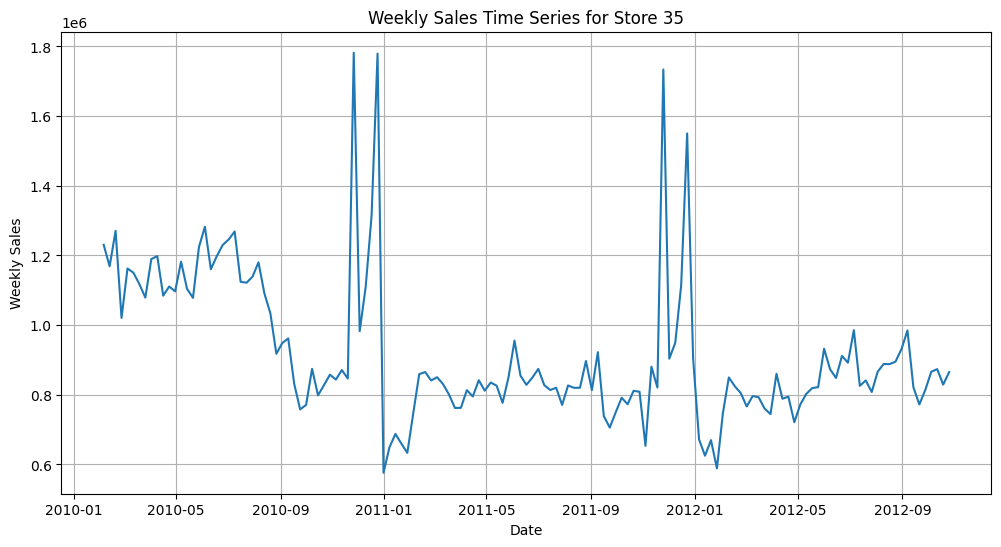

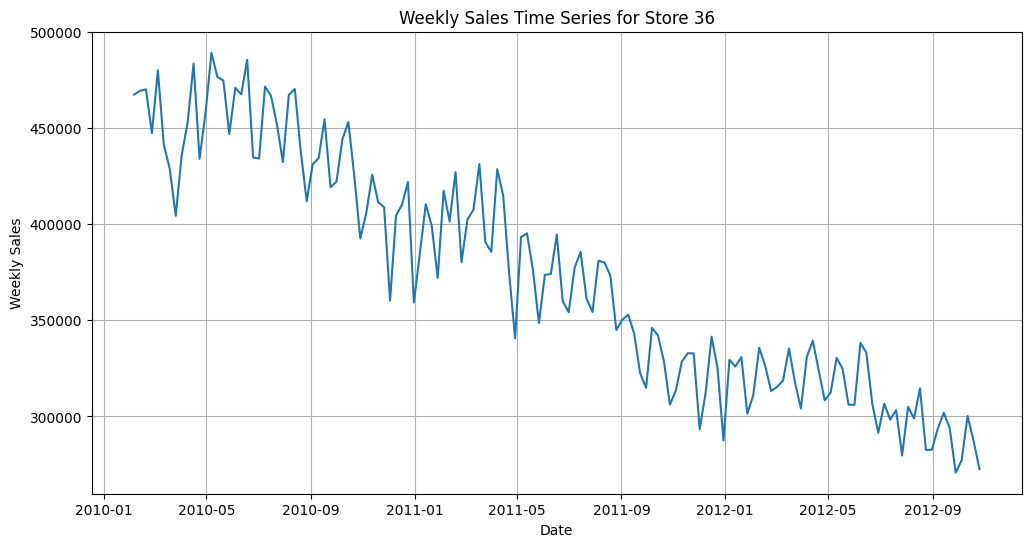

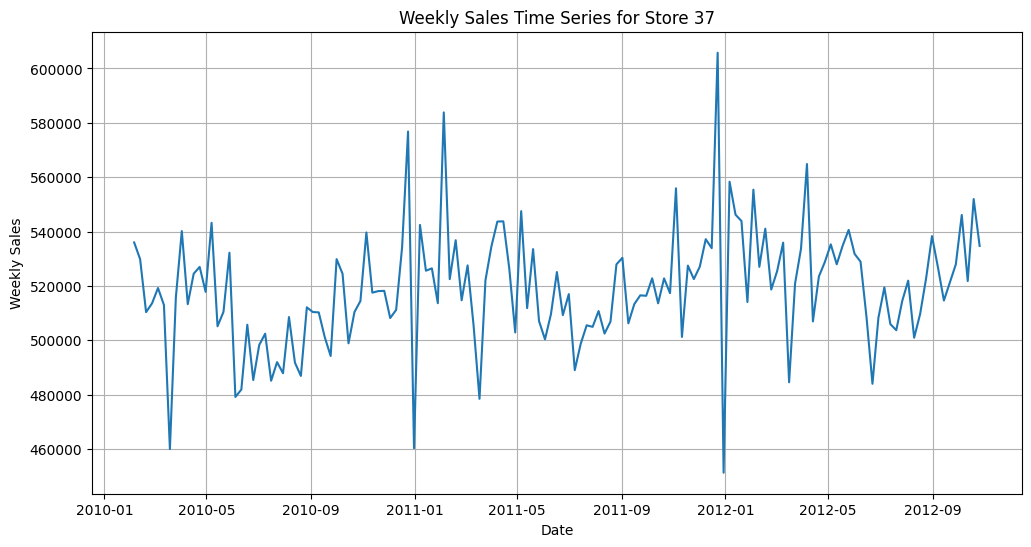

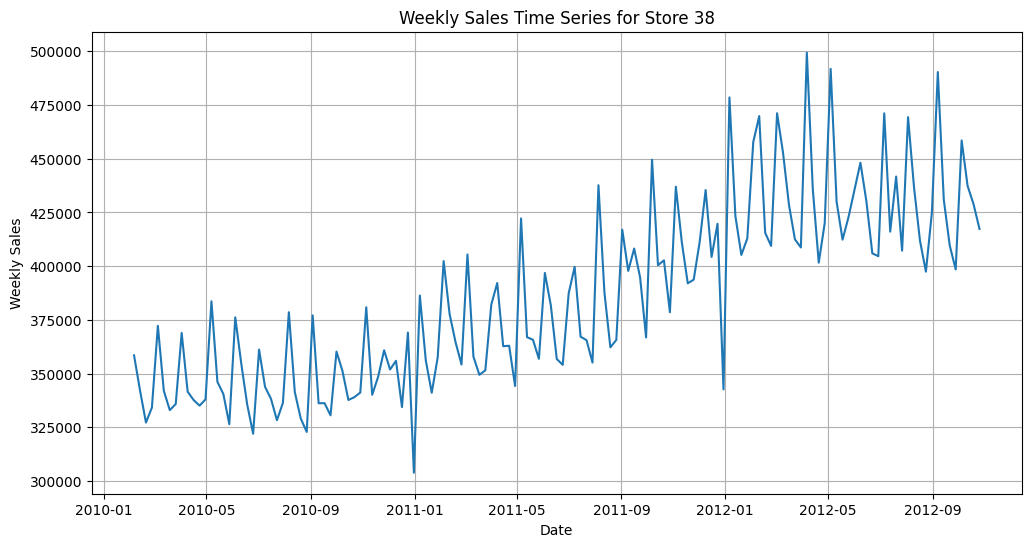

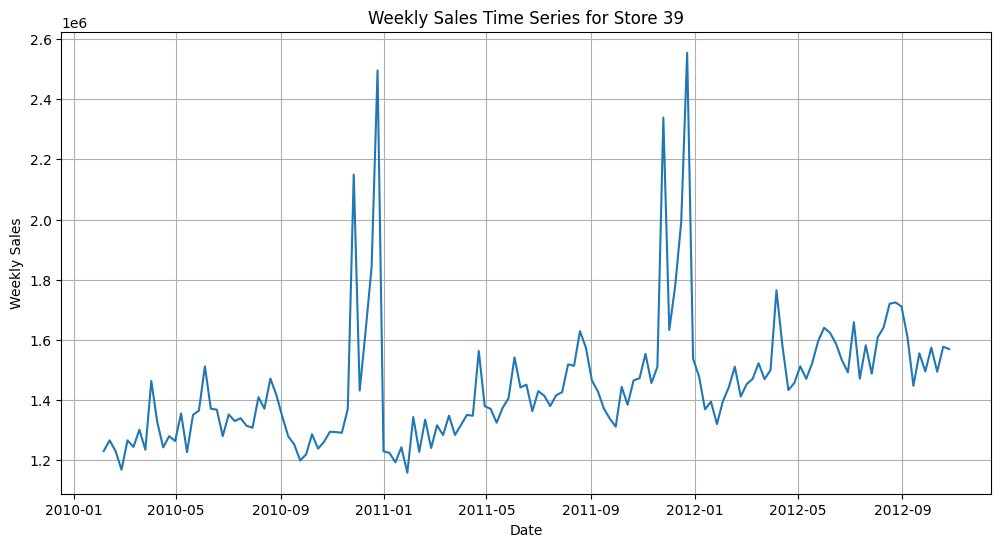

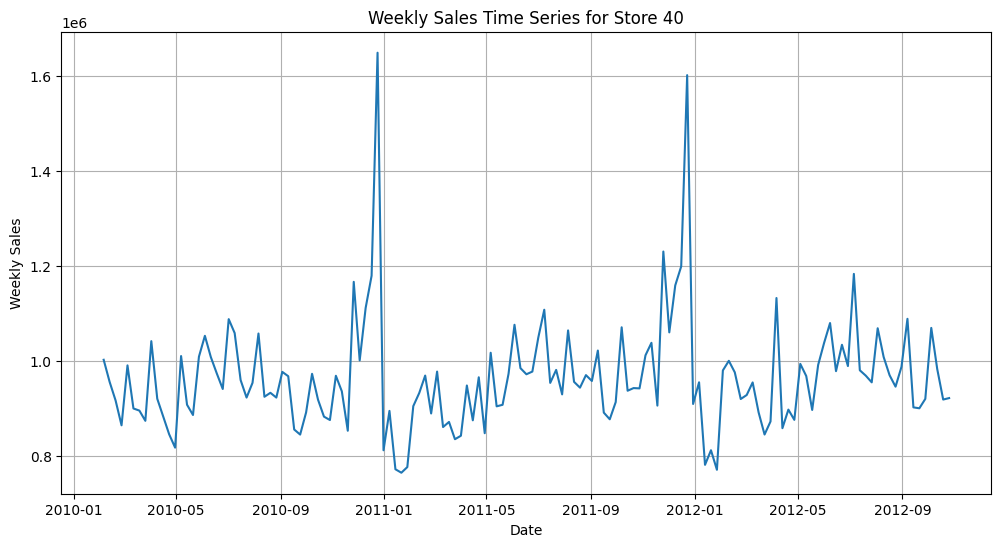

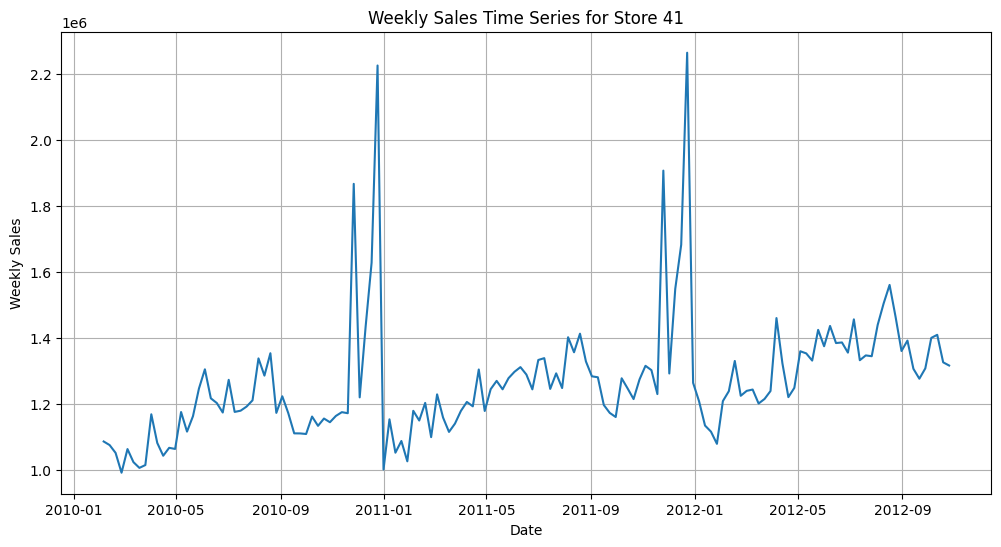

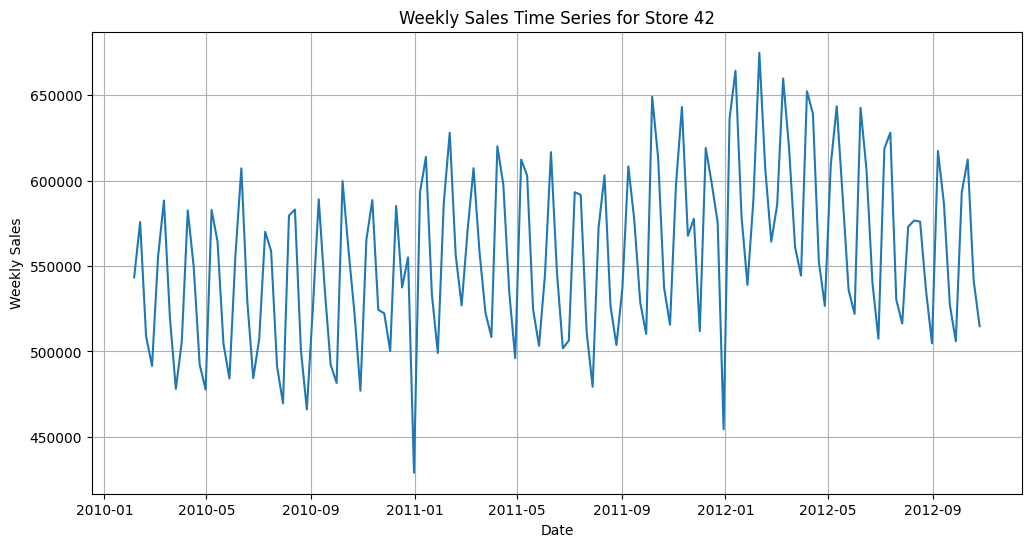

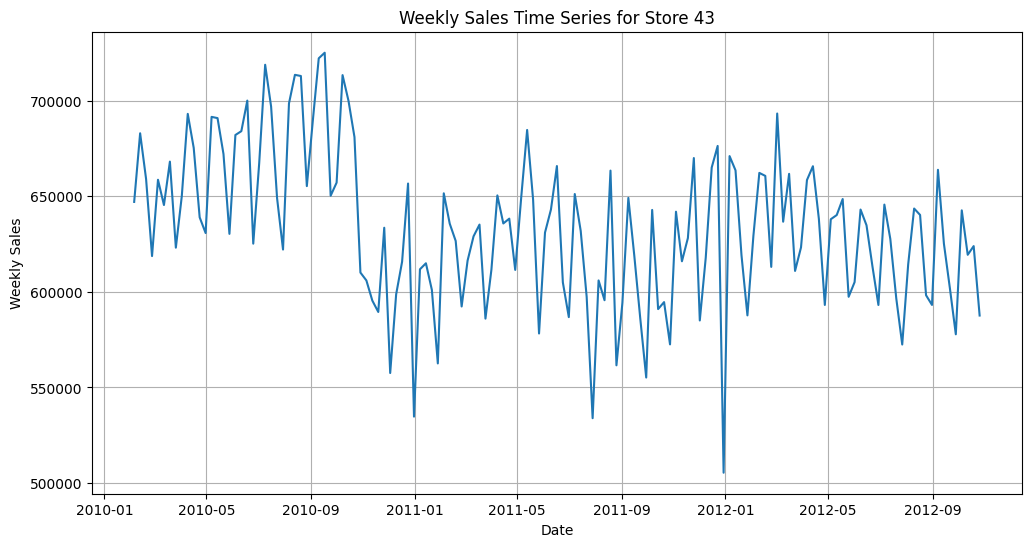

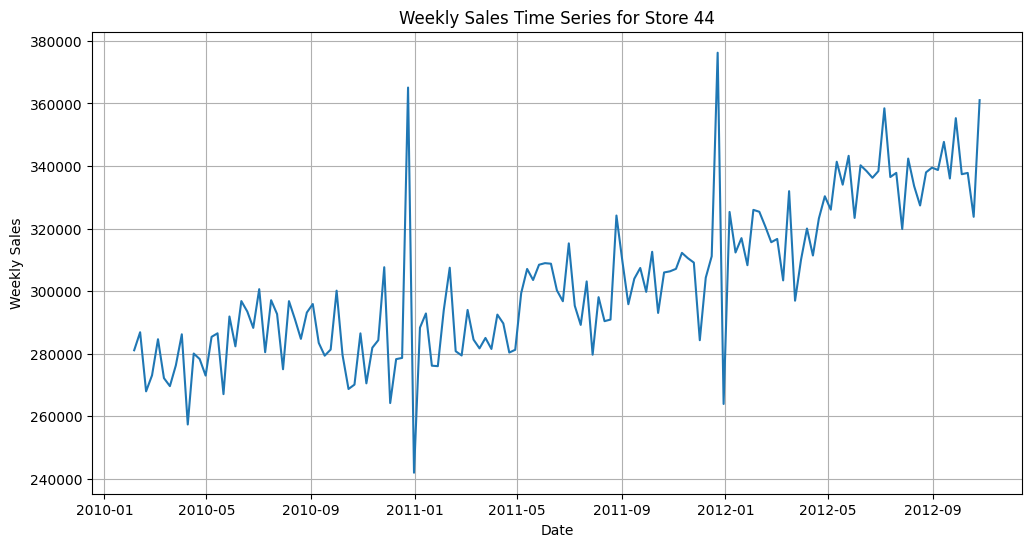

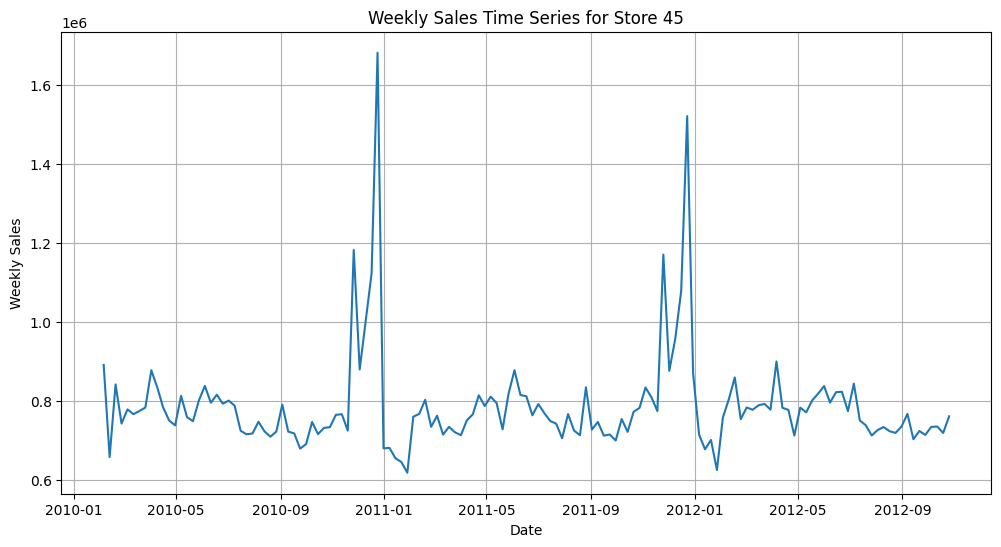

In [ ]:
import matplotlib.pyplot as plt

# Get the unique store IDs from the pseudo-panel DataFrame
stores = pseudo_panel_df['Store'].unique()

# Iterate through each store and create a time series plot
for store in stores:
    # Filter the pseudo-panel data for the current store
    store_df = pseudo_panel_df[pseudo_panel_df['Store'] == store]

    # Create the time series plot
    plt.figure(figsize=(12, 6))
    plt.plot(store_df['Date'], store_df['Weekly_Sales'])
    plt.title(f'Weekly Sales Time Series for Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.grid(True)
    plt.show()

# Task
Create a pseudo panel from the database data, using stores as cohorts. Then, create a time series for each store using the pseudo panel. Finally, split the pseudo panel data into training and testing sets and fit a neural network model to the data.

## Split data

### Subtask:
Divide the `pseudo_panel_df` into training and testing sets.


**Reasoning**:
Split the pseudo-panel data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(pseudo_panel_df, test_size=0.2, random_state=42)

## Define features and target

### Subtask:
Separate the features (independent variables) and the target variable (Weekly_Sales) for both the training and testing sets.


**Reasoning**:
Separate the features and target variables for both the training and testing sets as instructed.



In [ ]:
X_train = train_df.drop([ 'Weekly_Sales', "Date"], axis=1)
y_train = train_df['Weekly_Sales']
X_test = test_df.drop([ 'Weekly_Sales',  "Date"], axis=1)
y_test = test_df['Weekly_Sales']

## Build and train the neural network model

### Subtask:
Create a neural network model using a library like TensorFlow or Keras and train it on the training data.


**Reasoning**:
Import the necessary libraries for building a neural network and define, compile, and train a simple sequential neural network model on the training data.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,  # You can adjust the number of epochs
                    batch_size=32, # You can adjust the batch size
                    validation_data=(X_test, y_test))

## Scale features and retrain the model

### Subtask:
Scale features and retrain the neural network model.

**Reasoning**:
Scale the training and testing features using `StandardScaler` and then retrain the neural network model with the scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are already defined from previous steps

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model (same architecture as before)
model_scaled = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model_scaled.compile(optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

# Train the model with scaled data
history_scaled = model_scaled.fit(X_train_scaled, y_train,
                                  epochs=200,  # You can adjust the number of epochs
                                  batch_size=32, # You can adjust the batch size
                                  validation_data=(X_test_scaled, y_test))

## Evaluate the model with scaled data

### Subtask:
Evaluate the performance of the trained model on the scaled testing data.

**Reasoning**:
Evaluate the performance of the trained model on the scaled testing data using appropriate metrics like Mean Squared Error (MSE) and R-squared.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_test, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_test, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_train_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_train, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_train, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

## Summary:

### Data Analysis Key Findings

* The features of the training and testing data were successfully scaled using `StandardScaler`.
* A sequential neural network model with the same architecture as before was trained on the scaled training data.
* The model was evaluated on the scaled testing data.

### Insights or Next Steps

* Analyze the MSE and R-squared values obtained from the model trained on scaled data. Compare these results to the unscaled model to determine if scaling improved performance.
* If the performance is still not satisfactory, consider further steps such as:
    * **Hyperparameter Tuning:** Experiment with different numbers of layers, neurons per layer, activation functions, optimizers, and epochs.
    * **Feature Engineering:** Create new features that might be more relevant to predicting weekly sales (e.g., combining existing features, creating lag features).
    * **Different Model Architectures:** Explore more complex neural network architectures or other types of regression models (e.g., Random Forest, Gradient Boosting).
    * **Regularization:** Implement techniques like L1 or L2 regularization to prevent overfitting.

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are already defined from previous steps

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model (same architecture as before)
model_scaled = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(42, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model_scaled.compile(optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

# Train the model with scaled data
history_scaled = model_scaled.fit(X_train_scaled, y_train,
                                  epochs=200,  # You can adjust the number of epochs
                                  batch_size=32, # You can adjust the batch size
                                  validation_data=(X_test_scaled, y_test))

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1411332964352.0000 - mean_absolute_error: 1045870.1875 - val_loss: 1433802506240.0000 - val_mean_absolute_error: 1054352.0000
Epoch 2/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1408399310848.0000 - mean_absolute_error: 1042461.0625 - val_loss: 1410976055296.0000 - val_mean_absolute_error: 1043823.3125
Epoch 3/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1381691031552.0000 - mean_absolute_error: 1032167.3125 - val_loss: 1302012755968.0000 - val_mean_absolute_error: 992544.0000
Epoch 4/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1226642554880.0000 - mean_absolute_error: 955721.2500 - val_loss: 1045658796032.0000 - val_mean_absolute_error: 859680.5000
Epoch 5/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 934351732736.0000 - mean_absolute_error: 799366.5000 - val_loss: 693265629184.0000 - val_mean_absolute_error: 665642.4375
Epoch 6/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 604773023744.0000 - mea

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_test, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_test, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error on Scaled Test Data: 247736075128.233
R-squared on Scaled Test Data: 0.2310024369516811


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_train_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_train, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_train, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error on Scaled Test Data: 243573648600.34274
R-squared on Scaled Test Data: 0.23288050564362262


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Assuming X_train, X_test, y_train, and y_test are already defined from previous steps

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model (same architecture as before)
model_scaled = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(80, activation='relu'),
    Dense(60, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model_scaled.compile(optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Monitor validation loss and stop after 10 epochs without improvement

# Train the model with scaled data and EarlyStopping
history_scaled = model_scaled.fit(X_train_scaled, y_train,
                                  epochs=200,  # Set a high number of epochs, EarlyStopping will stop it
                                  batch_size=32, # You can adjust the batch size
                                  validation_data=(X_test_scaled, y_test),
                                  callbacks=[early_stopping]) # Add the callback

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1429970878464.0000 - mean_absolute_error: 1049402.2500 - val_loss: 1428390281216.0000 - val_mean_absolute_error: 1051852.8750
Epoch 2/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1434070155264.0000 - mean_absolute_error: 1049845.3750 - val_loss: 1295317204992.0000 - val_mean_absolute_error: 989221.6250
Epoch 3/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1166849081344.0000 - mean_absolute_error: 925034.0000 - val_loss: 805111267328.0000 - val_mean_absolute_error: 726522.3750
Epoch 4/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 604857368576.0000 - mean_absolute_error: 615316.3125 - val_loss: 372805402624.0000 - val_mean_absolute_error: 487520.8750
Epoch 5/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 329866608640.0000 - mean_absolute_error: 459790.8438 - val_loss: 313444892672.0000 - val_mean_absolute_error: 448846.5625
Epoch 6/200
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 313756942336.0000 - mean_abs

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_test, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_test, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error on Scaled Test Data: 247441432365.23785
R-squared on Scaled Test Data: 0.23191703756685522


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
predictions_scaled = model_scaled.predict(X_train_scaled)

# Calculate Mean Squared Error
mse_scaled = mean_squared_error(y_train, predictions_scaled)

# Calculate R-squared
r2_scaled = r2_score(y_train, predictions_scaled)

# Print the metrics
print(f"Mean Squared Error on Scaled Test Data: {mse_scaled}")
print(f"R-squared on Scaled Test Data: {r2_scaled}")

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Squared Error on Scaled Test Data: 243783356499.3184
R-squared on Scaled Test Data: 0.23222004414317243


En este Colab, se utilizó un modelo de red neuronal secuencial para predecir las ventas semanales (Weekly_Sales).

El modelo tiene la siguiente arquitectura:

Una capa densa con 100 neuronas y función de activación ReLU.
Una capa densa con 80 neuronas y función de activación ReLU.
Una capa densa con 60 neuronas y función de activación ReLU.
Una capa de salida densa con 1 neurona (para la regresión lineal).
El modelo se compiló utilizando el optimizador 'adam' y la función de pérdida 'mean_squared_error', con 'mean_absolute_error' como métrica adicional.

Para entrenar el modelo y evitar el sobreajuste, se utilizó un EarlyStopping callback que monitorea la pérdida de validación (val_loss) y detiene el entrenamiento si no hay mejora después de 10 épocas, restaurando los mejores pesos.

Después de escalar las características de los datos de entrenamiento y prueba utilizando StandardScaler, el modelo se entrenó con estos datos escalados.

Los resultados de la evaluación del modelo en los datos de prueba escalados fueron:

Mean Squared Error (MSE): 247,441,432,365.23785
R-squared: 0.23191703756685522
Estos resultados indican que el modelo explica aproximadamente el 23.2% de la varianza en las ventas semanales de los datos de prueba. El MSE es un valor grande, lo que sugiere que las predicciones del modelo tienen un error cuadrático medio considerable.